In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##### Seaborn 스타일 변경

In [3]:
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

#mpl.rc('font', family='nanumgothic')
#mpl.rc('axes', unicode_minus=Flase)

#####  샘플데이터 로드

In [4]:
iris = sns.load_dataset("iris")
print(iris.shape)
iris.head(2)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [5]:
titanic = sns.load_dataset("titanic")
print(titanic.shape)
titanic.head(2)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [6]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head(2)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [7]:
flights = sns.load_dataset("flights")
print(flights.shape)
flights.head(2)

(144, 3)


,year,month,passengers
0,1949,January,112
1,1949,February,118


## 1차원 실수 분포 플롯
* 커널밀도 및 러그 표시 기능 및 다차원 복합분포 기능 제공
* rugplot
* kdeplot
* distplot
* countplot

##### rugplot
* 빈도수를 갯수로 표시하는 그래프

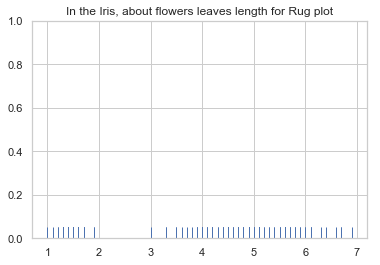

In [8]:
x = iris.petal_length.values
sns.rugplot(x)
plt.title("In the Iris, about flowers leaves length for Rug plot")
plt.show()

##### kdeplot
* kernel density estimation
* 빈도수를 히스토그램화해서 그래프로 표현

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


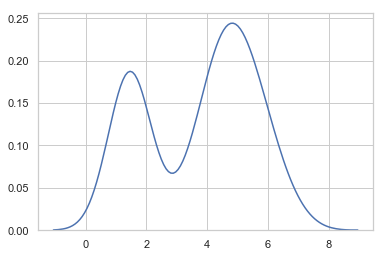

In [9]:
sns.kdeplot(x)
plt.show()

##### distplot
* rug 와 kde를 지원하며, 구간의 지정하는게 가능한 그래프

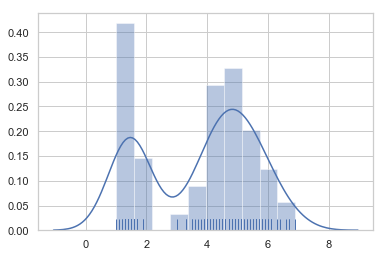

In [10]:
sns.distplot(x, kde=True, rug=True, bins=10)
plt.show()

##### countplot
* 숫자가 아닌 데이터의 갯수를 새서 보여주는 막대 그래프

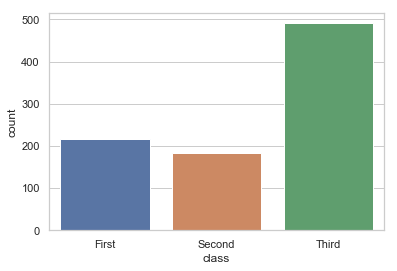

In [11]:
sns.countplot(x="class", data=titanic)
plt.show()

## 다차원 데이터

##### 2차원 실수형 데이터

##### jointplot

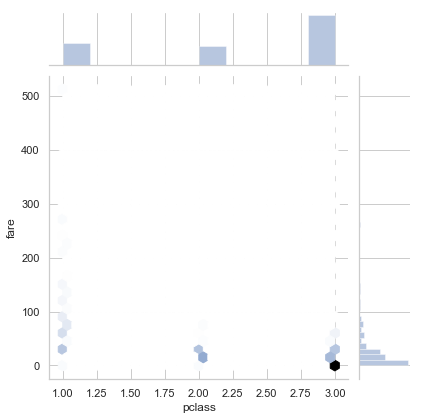

In [30]:
sns.jointplot(x='pclass', y='fare', data=titanic, kind="hex")

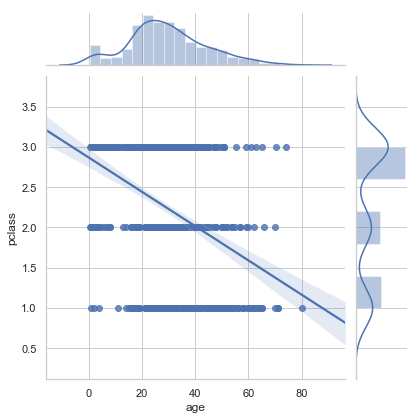

In [31]:
sns.jointplot(x="age", y="pclass", data=titanic, kind="reg")

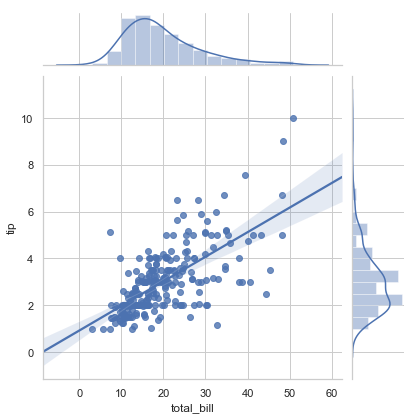

In [36]:
sns.jointplot("total_bill", "tip", data=tips, kind="reg")

##### 다차원 실수형 데이터

##### pairplot

In [18]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


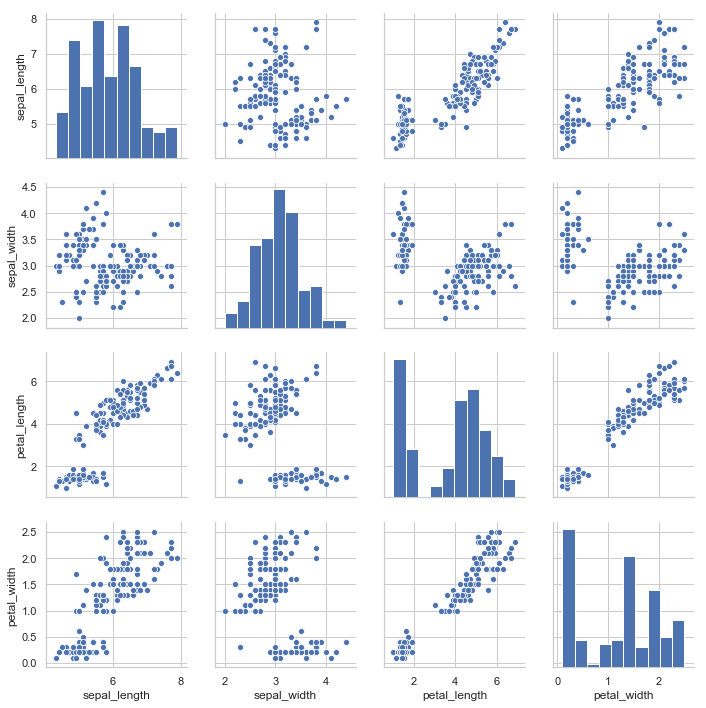

In [14]:
sns.pairplot(iris)

##### 다면 히스토그램

##### facetgrid

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


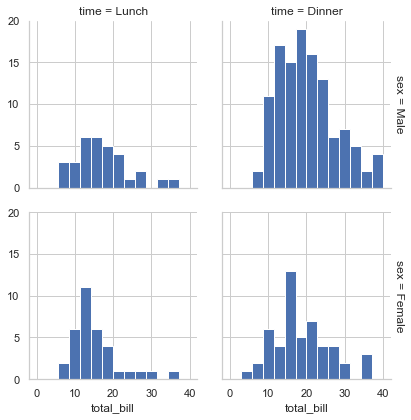

In [27]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "total_bill", bins=np.linspace(0,40,15))

##### 요인 플롯

##### factor plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


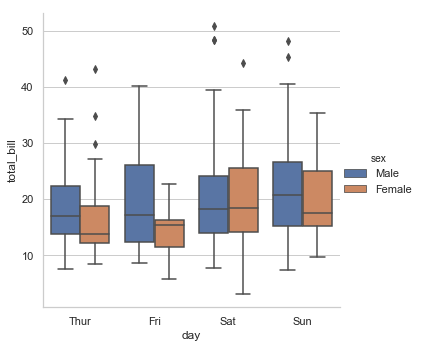

In [45]:
g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")

##### 2차원 카테고리 데이터 

In [15]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


##### heatmap

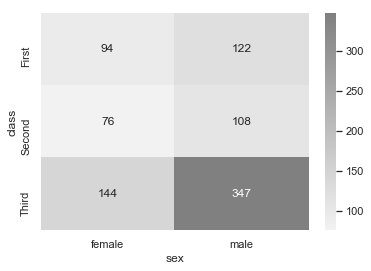

In [16]:
sns.heatmap(titanic_size, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="d")

#### 이차원 복합 데이터
* barplot
* boxplot
* violinplot
* stripplot
* swarmplot

##### 다차원 복합 데이터
* catplot